## COMBINED CYCLE POWER PLANT

OBJECTIVE:
    
    WE USE ALL TYPES OF REGRESSION MODEL IN ORDER TO CHOOSE THE BEST REGRESSION MODEL BY COMPARING R2

#### IMPORT THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### IMPORT THE DATASET

In [4]:
data=pd.read_csv('C:/Users/Win 10/Desktop/MACHINE LEARNING/REGRESSION/7.MODEL SELECTION AND EVALUATION/Data (1).csv')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


AT: ENERGY TEMPERATURE 
    
V: EXHAUST VACUUM
    
AP: AMBIENT PRESSURE
    
RH: RELATIVE HUMIDITY

##### SPLIT THE DATA INTO MATRIX OF FEATURES X AND DEPENDENT VECTOR Y

In [5]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [6]:
pd.DataFrame(X).head()

,0,1,2,3
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [12]:
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [7]:
pd.DataFrame(Y).head()

,0
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


In [16]:
Y=Y.reshape(len(Y),1)

#### PREPROCESS THE DATASET

##### HANDLE MISSING VALUES

In [9]:
from sklearn.impute import SimpleImputer as SI
imputer_X=SI(missing_values=np.nan, strategy='mean')
imputer_Y=SI(missing_values=np.nan, strategy='mean')

In [14]:
imputer_X.fit(X)
imputer_Y.fit(Y)

SimpleImputer()

##### SPLIT THE DATA INTO TRAIN AND TEST SET

In [70]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test= tts(X,Y,test_size=0.3,random_state=0)

## MULTIPLE LINEAR REGRESSION MODDEL

REGRESSION MODEL: Y= B0 + (B1$*$X1) + (B2$*$X2) + (B3$*$X3) + (B4$*$X4)

In [23]:
from sklearn.linear_model import LinearRegression as LR
R1=LR()
R1.fit(X_train,Y_train)

LinearRegression()

In [25]:
R1.coef_

array([[-1.96432098, -0.24009895,  0.06801034, -0.15645329]])

In [26]:
R1.intercept_

array([448.56131771])

SO THE REGRESSION LINE IS :
    
    Y= 448.56 -1.96$*$X1 -0.24$*$X2 + 0.068$*$X3 -0.16$*$X4

##### VISUALIZATION (TRAIN SET)

IDEA: SINCE THE HAVE 4 REGRESSORS, IT IS IMPOSSIBLE TO VISUALIZE THE REGRESSION LINE, INSTEAD, I WILL PLOT THE ERROR OF Y AND PREDICTED Y FROM BOTH TRAIN AND TEST SET

In [43]:
Y_train_pred= R1.predict(X_train)
Y_test_pred=R1.predict(X_test)

In [34]:
n= len(Y_train)
m=len(Y_test)

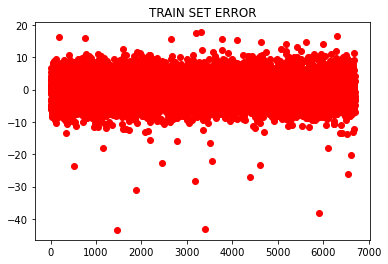

In [41]:
# TRAIN SET
plt.scatter(range(n), Y_train-Y_train_pred, color='red')
plt.title('TRAIN SET ERROR')
plt.show()

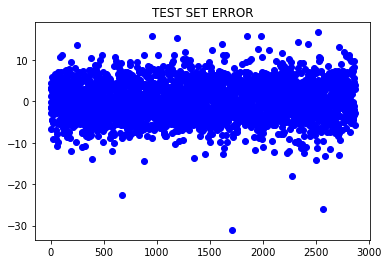

In [44]:
# TEST SET
plt.scatter(range(m), Y_test-Y_test_pred, color='blue')
plt.title('TEST SET ERROR')
plt.show()

##### R-SQUARE

In [46]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred)

0.9304112159477683

WAO, THIS R2 IS PRETTY HIGH $*-*$

## POLYNOMIAL REGRESSION MODEL

In [47]:
R2=LR()

In [52]:
from sklearn.preprocessing import PolynomialFeatures as PF
poly_R2_train=PF(degree=4)
poly_X_train=poly_R2_train.fit_transform(X_train)
R2.fit(poly_X_train,Y_train)

LinearRegression()

In [56]:
poly_R2_test=PF(degree=4)
poly_X_test=poly_R2_test.fit_transform(X_test)

In [58]:
Y_train_pred=R2.predict(poly_X_train)
Y_test_pred=R2.predict(poly_X_test)

##### VISUALIZATION

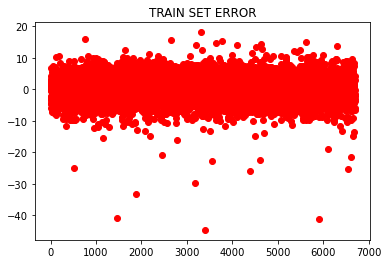

In [59]:
plt.scatter(range(n),Y_train-Y_train_pred,color='red')
plt.title('TRAIN SET ERROR')
plt.show()

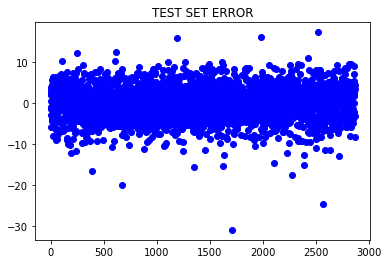

In [61]:
plt.scatter(range(m),Y_test-Y_test_pred,color='blue')
plt.title('TEST SET ERROR')
plt.show()

##### R-SQUARE

In [62]:
r2_score(Y_test, Y_test_pred)

0.9443659789279987

WAO, THIS RESULT IS EVEN SLIGHTLY BETTER THAN MULTIPLE LINEAR REGRESSION

## SUPPORT VECTOR REGRESSION (SVR)

NOTE THAT ESPECIALLY WITH SVR, WE MUST INCLUDE THE FEATURE SCALLING

##### FEATURE SCALLING

In [85]:
from sklearn.preprocessing import StandardScaler as SS
ss_X=SS()
ss_Y= SS()

In [86]:
ss_X_train=ss_X.fit_transform(X_train)
ss_Y_train=ss_Y.fit_transform(Y_train)

In [87]:
from sklearn.svm import SVR
R3=SVR(kernel='rbf')
R3.fit(ss_X_train,ss_Y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [90]:
Y_train_pred=ss_Y.inverse_transform(R3.predict(ss_X_train)).reshape(n,1)
Y_test_pred=ss_Y.inverse_transform(R3.predict(ss_X.transform(X_test))).reshape(m,1)

##### VISUALIZATION

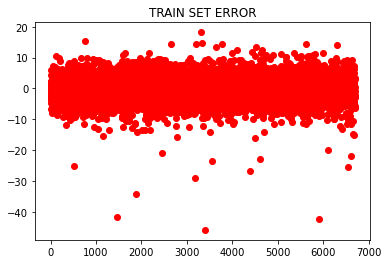

In [91]:
plt.scatter(range(n),Y_train-Y_train_pred,color='red')
plt.title('TRAIN SET ERROR')
plt.show()

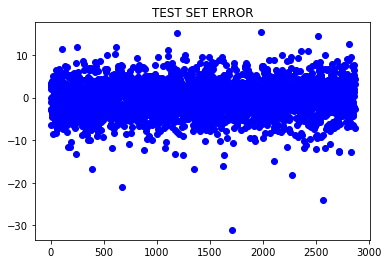

In [92]:
plt.scatter(range(m),Y_test-Y_test_pred, color='blue')
plt.title('TEST SET ERROR')
plt.show()

##### R-SQUARE 

In [93]:
r2_score(Y_test, Y_test_pred)

0.946372676277413

WAO, AMAZING

## DECISION TREE REGRESSION 

In [102]:
from sklearn.tree import DecisionTreeRegressor as DT
R4=DT(random_state=0)
R4.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [103]:
Y_train_pred=R4.predict(X_train).reshape(n,1)
Y_test_pred= R4.predict(X_test).reshape(m,1)

##### VISUALIZATION

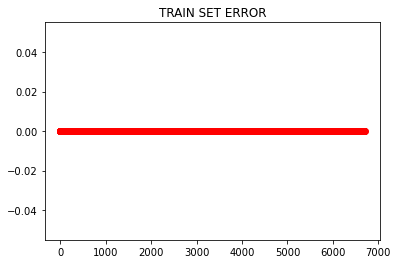

In [104]:
plt.scatter(range(n), Y_train-Y_train_pred, color='red')
plt.title('TRAIN SET ERROR')
plt.show()

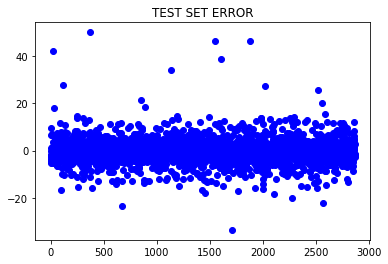

In [105]:
plt.scatter(range(m), Y_test-Y_test_pred, color='blue')
plt.title('TEST SET ERROR')
plt.show()

INTERSTINGLY, SINCE THE ALGORITHM OF DECISION TREE FIT PERFECTLY TO THE TRAIN SET, ITS EFFECTIVENESS IN THE TEST SET IS JUST AS WELL AS OTHER MODELS

##### R-SQUARE

In [106]:
r2_score(Y_test, Y_test_pred)

0.9160412481867937

## RANDOM FOREST REGRESSION

In [107]:
from sklearn.ensemble import RandomForestRegressor as RF
R5= RF(n_estimators=10, random_state=0)
R5.fit(X_train, Y_train)

<ipython-input-107-6caa11ccf8fb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R5.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [110]:
Y_train_pred=R5.predict(X_train).reshape(n, 1)
Y_test_pred=R5.predict(X_test).reshape(m,1)

##### VISUALIZATION

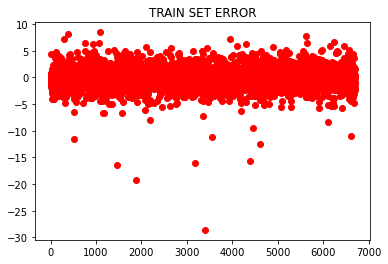

In [111]:
plt.scatter(range(n), Y_train-Y_train_pred, color='red')
plt.title('TRAIN SET ERROR')
plt.show()

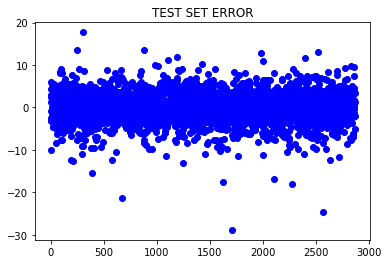

In [112]:
plt.scatter(range(m), Y_test-Y_test_pred, color='blue')
plt.title('TEST SET ERROR')
plt.show()

##### R-SQUARE

In [113]:
r2_score(Y_test, Y_test_pred)

0.9581755505692268